**This jupyter notebook demonstrates how to:**

1. Create bar plost from grouped by dataframes
2. Create histograms from panda series
3. Create bar plots from dataframes
4. 


In [0]:
#install libs that are not found at google colab by default
!pip install google

**Mount google drive to access files**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Important defines:
#total number of lift stations
NUMBER_OF_LIFT_STATIONS = 30 

#number of pumps per lift stations
PUMPS_PER_LIFT_STATION  = [2,2,3,3,3,1,2,3,2,2,3,3,2,2,2,
                           2,3,2,2,2,2,2,2,2,2,2,2,2,2,2]

#google drive folder where datasets are stored
DATASETS_DIR = r'/content/gdrive/My Drive/datasets/'                         


In [0]:
import pandas as pd
import numpy as np

**Analysis with lift stations register**

This data frame contains characteristics and specifications about sewage lift stations 

In [0]:
lift_station_register = pd.read_csv(DATASETS_DIR + r'cadastro_elevatorias.csv')

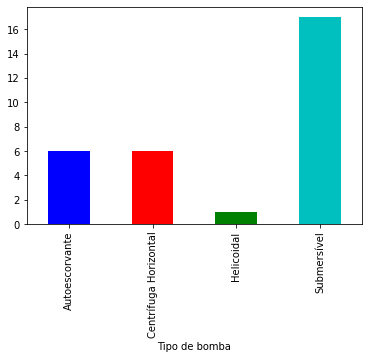

In [0]:
#Plot number of lift stations by pump type
lift_station_register.groupby(['Tipo de bomba'])['Tipo de bomba'].count().plot(kind='bar', color=['b', 'r', 'g', 'c'])


In [0]:
#define a function to plot histograms with some nice formatting

def hist_with_format(ds, bins, xlabel, ylabel):
  """
    plot a histogram

    Args:
        ds (series): panda series to create histogram.
        column_name (str): column name.
        bins (int): number of bins.
        xlabel (str): x axis label.
        ylabel (str): y axis label.                        

    Returns:
        Nothing  

  """
  ax = ds.hist(bins=bins, 
                grid=False, 
                figsize=(12,8),
                color='g', 
                zorder=2, 
                rwidth=0.9)

  # Despine
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)

  # Switch off ticks
  ax.tick_params(axis="both", which="both", 
                bottom="off", top="off", 
                labelbottom="on", left="off", 
                right="off", labelleft="on")

  # Draw horizontal axis lines
  vals = ax.get_yticks()
  for tick in vals:
      ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Remove title
  ax.set_title("")

  # Set x-axis label
  ax.set_xlabel(xlabel, labelpad=20, weight='bold', size=12)

  # Set y-axis label
  ax.set_ylabel(ylabel, labelpad=20, weight='bold', size=12)

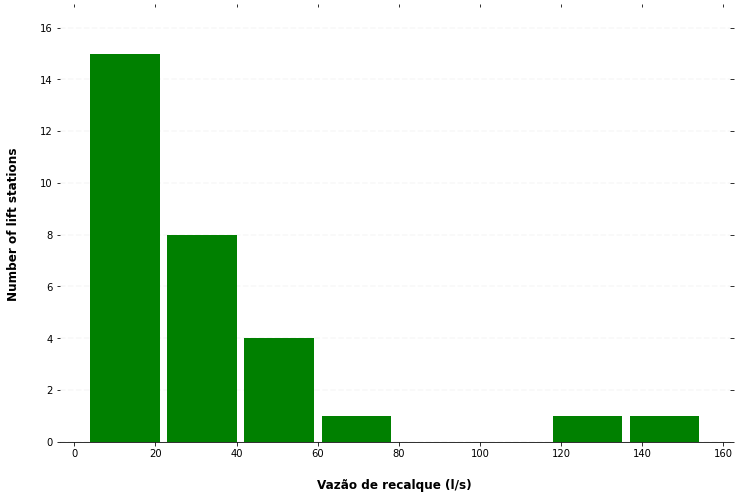

In [0]:
#Plot histogram of boost flow
ds = lift_station_register['Vazão de recalque (l/s)'].str.replace(',', '.').astype(float)

hist_with_format(ds, 
                 8, 
                 "Vazão de recalque (l/s)",
                 "Number of lift stations")

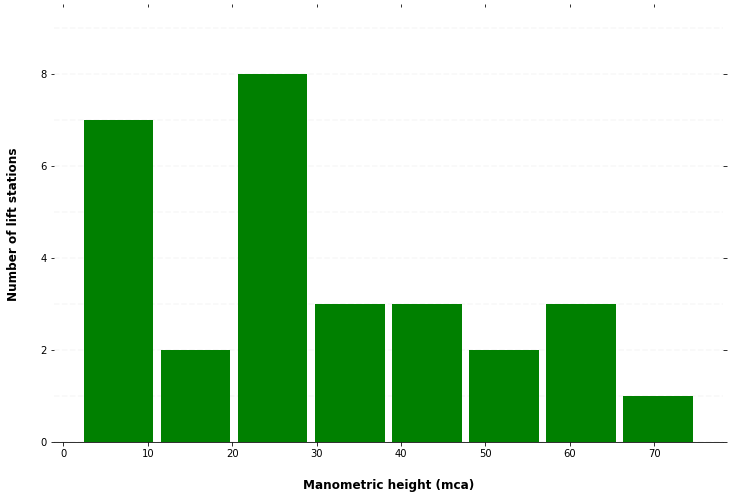

In [0]:
#Plot histogram of Manometric height
ds = lift_station_register['Altura manométrica (mca)'].str.replace(',', '.').astype(float)

hist_with_format(ds, 
                 8, 
                 "Manometric height (mca)",
                 "Number of lift stations")

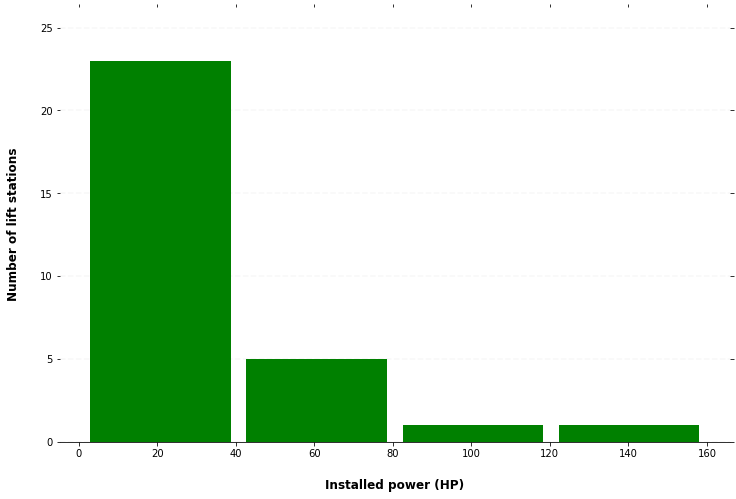

In [0]:
#Plot histogram of Manometric height
ds = lift_station_register['Potência instalada (cv)'].str.replace(',', '.').astype(float)

hist_with_format(ds, 
                 4, 
                 "Installed power (HP)",
                 "Number of lift stations")

**Weather stations data analysis**

Files where downloaded from http://www.inmet.gov.br/portal/index.php?r=bdmep/bdmep

Weather data are related to Sewage Lift Stations events because because part of the rainwater is improperly connected to the sewer network.

This dataset is composed by data from 9 weather stations wich are located in Belo Horizonte region. They are near sewage lift stations analysed at this master degree work.

Each weather station file contains daily precipitation between January 1, 2010 and December 31, 2018.


In [0]:
#load weather stations dataset
weather_stations = pd.read_csv(DATASETS_DIR + r'cadastro_estacoes.csv')

#load 9 weather stations datasets
weather_stations_data_list = []
for i,row in weather_stations.iterrows():
    weather_station_data = pd.read_csv(DATASETS_DIR + r'estacao_{0}.csv'.format(row['id']),delimiter=';')
    weather_station_data['datahora'] = pd.to_datetime(weather_station_data['Data'],format='%d/%m/%Y')
    weather_station_data.index = pd.to_datetime(weather_station_data['datahora'])
    #change the precipitation column name preparing for concatenation
    new_column_name = f"WeatherStation_{row['id']}"
    weather_station_data = weather_station_data.rename(columns = {'Precipitacao':new_column_name})
    weather_stations_data_list.append(weather_station_data[['datahora',new_column_name]])
    
weather_stations_datas = pd.concat(weather_stations_data_list, axis=1)
weather_stations_datas = weather_stations_datas.drop(columns=['datahora',])
weather_stations_datas = weather_stations_datas.fillna(0)

Text(0, 0.5, 'Total precipitation')

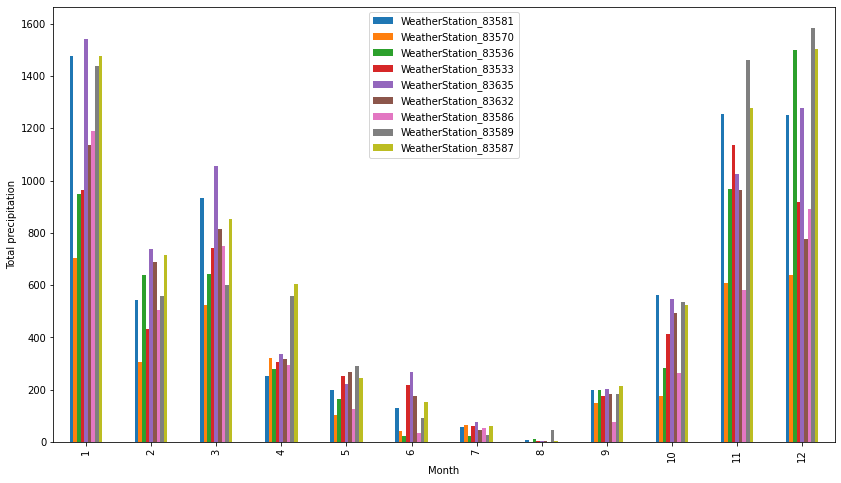

In [0]:
filtered_weather_stations_data = weather_stations_datas[(weather_stations_datas.index.year >= 2012) & (weather_stations_datas.index.year < 2018)]
gb = filtered_weather_stations_data.groupby([filtered_weather_stations_data.index.month]).agg('sum')
ax = gb.plot(kind="bar", figsize=(14, 8), )
ax.set_xlabel("Month")
ax.set_ylabel("Total precipitation")